In [18]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D

import random
import pickle
import pandas as pd
import cv2

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


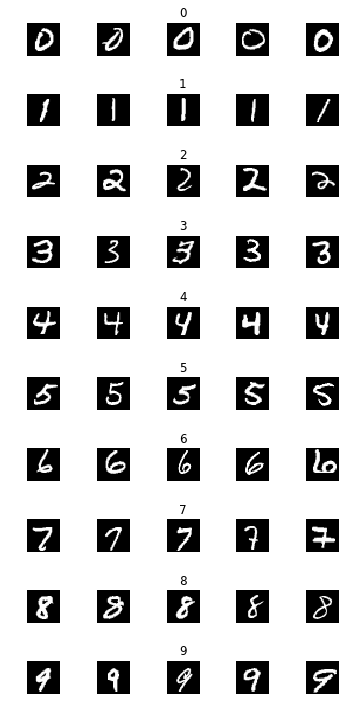

In [4]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


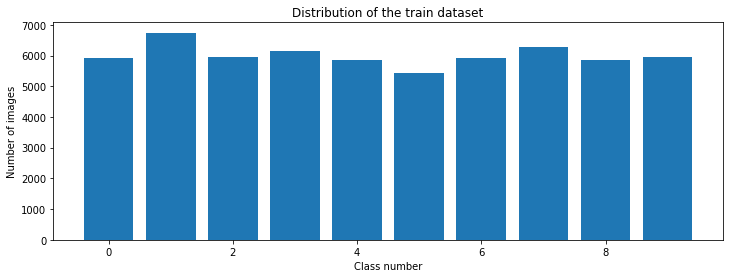

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [8]:
#define LeNet model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation=('softmax')))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics =['accuracy'])
    return model

In [9]:
model = leNet_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)      

In [10]:
history = model.fit(X_train, y_train, epochs = 10, validation_split =0.1, batch_size = 400, verbose =1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 38s 699us/step - loss: 0.2533 - acc: 0.9179 - val_loss: 0.0514 - val_acc: 0.9838
Epoch 2/10
54000/54000 [==============================] - 37s 689us/step - loss: 0.0721 - acc: 0.9776 - val_loss: 0.0459 - val_acc: 0.9868
Epoch 3/10
54000/54000 [==============================] - 42s 781us/step - loss: 0.0638 - acc: 0.9796 - val_loss: 0.0495 - val_acc: 0.9853
Epoch 4/10
54000/54000 [==============================] - 40s 738us/step - loss: 0.0568 - acc: 0.9818 - val_loss: 0.0383 - val_acc: 0.9890
Epoch 5/10
54000/54000 [==============================] - 40s 745us/step - loss: 0.0461 - acc: 0.9855 - val_loss: 0.0399 - val_acc: 0.9878
Epoch 6/10
54000/54000 [==============================] - 38s 703us/step - loss: 0.0432 - acc: 0.9867 - val_loss: 0.0318 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 39s 717us/s

Text(0.5, 0, 'epochs')

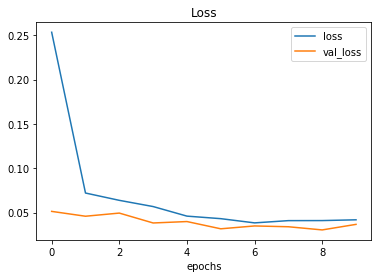

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

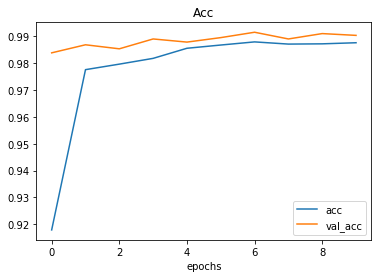

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Acc')
plt.xlabel('epochs')

In [13]:
score = model.evaluate(X_test, y_test, verbose= 1)
print('Test score', score[0])
print('Test accuracy', score[1])

10000/10000 [==============================] - 4s 396us/step
Test score 0.03505756215095207
Test accuracy 0.9888


(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


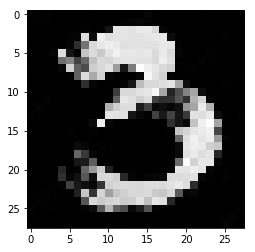

In [14]:
#predict internet number
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

In [15]:
from keras.models import load_model

In [17]:
#save results
model.save('ccn_model.h5')  # creates a HDF5 file 'my_model.h5'

In [22]:
from keras.models import Model

In [25]:


# returns a compiled model
# identical to the previous one
model = load_model('ccn_model.h5')

In [26]:
layer1 = Model(inputs=model.layers[0], output = model.layers[0].output)
layer2 = Model(inputs=model.layers[0], output = model.layers[2].output)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=<keras.lay..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


ValueError: Input tensors to a Model must come from `keras.layers.Input`. Received: <keras.layers.convolutional.Conv2D object at 0x000002231222F7F0> (missing previous layer metadata).